## Load data

In [1]:
# Week 2 homework, Cifar10 dataset classifier.
# Loading Cifar10 dataset
from keras.datasets import cifar10
#the convolutional neural network
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

from keras.layers import Conv2D   #the connection is a convolution on 2D image
from keras.layers import MaxPooling2D  #maxpooling is taking subsamples with 
from keras.layers import Flatten, Dropout       #no change except dimensions
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [2]:
print('x_train shape:', x_train.shape)   
print('y_train shape:', y_train.shape)  
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [0]:
#Inspect 1 data point, the first image
image1=x_train[0]
label1=y_train[0]
#print (image1)
#print ('data label=', label1)  #show data label

def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

    # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

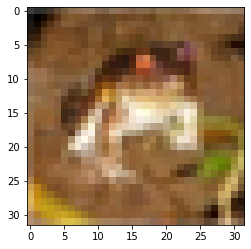

In [4]:
from matplotlib import pyplot

#imshow does image display, image 1 is 32x32x3 3-d array (tensor)
pyplot.imshow(image1);

In [5]:
#review pixel values at different points
print (image1[0][0])  #darker means smaller value
print (image1[15][15])
#show red color, the first element is the largest
print (image1[7][16])
#show gree color, the second element is the largest
print (image1[23][27])

[59 62 63]
[247 234 212]
[181 102  69]
[118 141  20]


In [0]:
# Normalize the number to be between 0 and 1 (the max is 255)

#convert the data type to floating number
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train / 255
x_test = x_test / 255

In [7]:
# convert class vectors to 1-hot representation
num_classes = 10

from keras.utils import to_categorical
print (y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print (y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
input_shape = (32, 32, 3)
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu',
                 input_shape=input_shape, padding='same'))   #padding='same' means the same as kernel size
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (5, 5), activation='relu',padding='same'))  #default strides=(1,1)
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (5, 5), activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model2.add(Dropout(0.4))
model2.add(Flatten())  
model2.add(Dense(1000, activation='relu')) #1000 is the number of nodes on this layer
model2.add(Dense(num_classes, activation='softmax'))  #Output layer
model2.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        256 

In [9]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
history = model2.fit(x_train, y_train, epochs=200, batch_size=128, verbose=1, 
          validation_data=(x_test, y_test))  #verbose=1 shows progress bar,

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 33s 652us/step - loss: 1.6006 - acc: 0.4809 - val_loss: 1.5203 - val_acc: 0.4885
Epoch 2/200
50000/50000 [==============================] - 28s 563us/step - loss: 1.0485 - acc: 0.6289 - val_loss: 1.2907 - val_acc: 0.5376
Epoch 3/200
50000/50000 [==============================] - 28s 564us/step - loss: 0.8423 - acc: 0.7049 - val_loss: 0.9246 - val_acc: 0.6766
Epoch 4/200
50000/50000 [==============================] - 28s 565us/step - loss: 0.7014 - acc: 0.7552 - val_loss: 0.8232 - val_acc: 0.7141
Epoch 5/200
50000/50000 [==============================] - 28s 565us/step - loss: 0.5984 - acc: 0.7902 - val_loss: 0.8789 - val_acc: 0.7103
Epoch 6/200
50000/50000 [==============================] - 28s 564us/step - loss: 0.5134 - acc: 0.8198 - val_loss: 0.9799 - val_acc: 0.6952
Epoch 7/200
50

KeyboardInterrupt: ignored

In [0]:
#plot_history(history)

#testing
scores = model2.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
